In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups, load_iris
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB as SKLMultinomialNB
from sklearn.naive_bayes import GaussianNB as SKLGaussianNB
from sklearn.metrics import accuracy_score

# 20 News Groups Dataset (Multinomial)

In [2]:
from naive_bayes import MultinomialNB 

# Load data
categories = ['sci.space', 'comp.graphics']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convert text to bag of words representation
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(newsgroups.data).toarray()
y = newsgroups.target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train and test
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
acc = mnb.score(X_test, y_test)

print(f"MultinomialNB Accuracy: {acc:.4f}")

MultinomialNB Accuracy: 0.8983


In [3]:
# Sample prediction
samples = np.random.choice(len(newsgroups), 5, replace=False)
X_s = [newsgroups.data[i] for i in samples]
y_s = newsgroups.target[samples]
X_s_vec = vectorizer.fit_transform(X_s).toarray()

# === Predict Using Custom MultinomialNB ===
y_s_pred = mnb.predict(X_s_vec)

# === Print Results ===
print("\nMultinomialNB Sample Predictions:")
for i in range(len(X_s)):
    print(f"\nSample {i+1}:")
    print(f"Original Text: {X_s[i][:300]}...")
    print(f"Predicted Label: {y_s_pred[i]} ({'sci.space' if y_s_pred[i] == 1 else 'comp.graphics'})")
    print(f"Actual Label: {y_s[i]} ({'sci.space' if y_s[i] == 1 else 'comp.graphics'})")


MultinomialNB Sample Predictions:

Sample 1:
Original Text: I read it refered to as the "parabolic cross-section" rule;
the idea was that if you plot the area of the fuselage cross-
section as a function of the point fore-and-aft along the 
fuselage, a plot that is a **paraboloid** minimizes somethin' 
or 'nother (to be technical about it).

...
Predicted Label: 1 (sci.space)
Actual Label: 1 (sci.space)

Sample 2:
Original Text: [Lots of stuff about how the commerical moonbase=fantasyland]

Then what do you believe will finally motivate people to leave the  
earth?  I'm not trying to flame you.  I just want to know where you  
stand.

-Chuck
---
*******************************************************************

	Chuck Chu...
Predicted Label: 1 (sci.space)
Actual Label: 1 (sci.space)

Sample 3:
Original Text: I am currently using POVRay on Mac and was wondering if anyone in netland
knows of public domain anti-aliasing utilities so that I can skip this step
in POV, very slow on this m

# Comparison

Custom MultinomialNB Accuracy: 0.8983
Sklearn MultinomialNB Accuracy: 0.8983


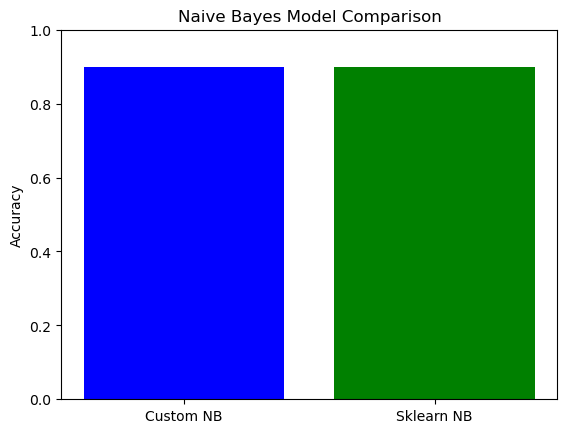

In [4]:
skl_mnb = SKLMultinomialNB()
skl_mnb.fit(X_train, y_train)
skl_y_pred = skl_mnb.predict(X_test)
skl_acc = accuracy_score(y_test, skl_y_pred)

# compare accuracy
print(f"Custom MultinomialNB Accuracy: {acc:.4f}")
print(f"Sklearn MultinomialNB Accuracy: {skl_acc:.4f}")

# visualization
plt.bar(['Custom NB', 'Sklearn NB'], [acc, skl_acc], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Naive Bayes Model Comparison')
plt.ylim(0, 1)
plt.show()

# Iris Dataset (Gaussian)

In [5]:
from naive_bayes import GaussianNB

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train and test
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"GaussianNB Accuracy: {acc:.4f}")

# Sample predictions
samples = np.random.choice(len(X_test), 5, replace=False)
X_s = X_test[samples]
y_s = y_test[samples]

y_s_pred = gnb.predict(X_s)

print("GaussianNB Sample Predictions:")
for i in range(len(X_s)):
    print(f"Sample {i+1}: Features={X_s[i]}, Predicted={y_s_pred[i]}, Actual={y_s[i]}")

GaussianNB Accuracy: 1.0000
GaussianNB Sample Predictions:
Sample 1: Features=[5.8 2.7 3.9 1.2], Predicted=1, Actual=1
Sample 2: Features=[6.3 3.3 4.7 1.6], Predicted=1, Actual=1
Sample 3: Features=[7.9 3.8 6.4 2. ], Predicted=2, Actual=2
Sample 4: Features=[5.7 3.8 1.7 0.3], Predicted=0, Actual=0
Sample 5: Features=[6.1 3.  4.9 1.8], Predicted=2, Actual=2


# Comparison

Custom GaussianNB Accuracy: 1.0000
Sklearn GaussianNB Accuracy: 1.0000


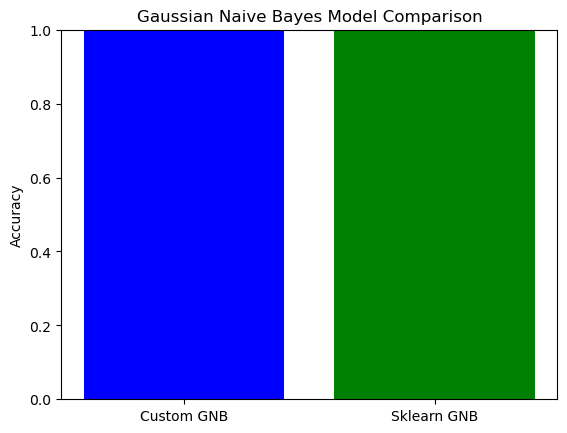

In [6]:
skl_gnb = SKLGaussianNB()
skl_gnb.fit(X_train, y_train)
skl_y_pred = skl_gnb.predict(X_test)
skl_acc = accuracy_score(y_test, skl_y_pred)

# compare accuracy
print(f"Custom GaussianNB Accuracy: {acc:.4f}")
print(f"Sklearn GaussianNB Accuracy: {skl_acc:.4f}")

# visualization
plt.bar(['Custom GNB', 'Sklearn GNB'], [acc, skl_acc], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Gaussian Naive Bayes Model Comparison')
plt.ylim(0, 1)
plt.show()